In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
file_path = 'creditcard.csv'

In [0]:
df = pd.read_csv(file_path)

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
df.shape

(213969, 31)

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213969 entries, 0 to 213968
Data columns (total 31 columns):
Time      213969 non-null float64
V1        213969 non-null float64
V2        213969 non-null float64
V3        213969 non-null float64
V4        213969 non-null float64
V5        213969 non-null float64
V6        213968 non-null float64
V7        213968 non-null float64
V8        213968 non-null float64
V9        213968 non-null float64
V10       213968 non-null float64
V11       213968 non-null float64
V12       213968 non-null float64
V13       213968 non-null float64
V14       213968 non-null float64
V15       213968 non-null float64
V16       213968 non-null float64
V17       213968 non-null float64
V18       213968 non-null float64
V19       213968 non-null float64
V20       213968 non-null float64
V21       213968 non-null float64
V22       213968 non-null float64
V23       213968 non-null float64
V24       213968 non-null float64
V25       213968 non-null float64
V26  

In [17]:
for column in df.columns:
    print(column, len(df[column].unique()))

Time 95677
V1 207817
V2 207817
V3 207817
V4 207817
V5 207817
V6 207817
V7 207817
V8 207817
V9 207817
V10 207817
V11 207817
V12 207817
V13 207817
V14 207817
V15 207817
V16 207817
V17 207817
V18 207817
V19 207817
V20 207817
V21 207817
V22 207817
V23 207817
V24 207817
V25 207817
V26 207817
V27 207817
V28 207817
Amount 28790
Class 3


In [0]:
df.isnull().sum()
# There doesnt seem to be obvious nulls

# Non-obvious nulls such as blanks: The line items where there are spaces 
blank_space_col_list = []
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    print(col, sum(df[col]==' '))
    if sum(df[col]==' '):
        blank_space_col_list.append(col)


In [20]:

# Drop any columns that can cause trouble for now and come back to it in future iterations
drop_column_list = []
df.drop(drop_column_list, axis=1, inplace=True)

df.head()

# When you are short of time, be ruthless & clinical in treating edge cases and null values
# For now, drop all the null rows instead of imputing them

print('Number of rows before dropping null values is {}'.format(len(df)))

# drop NaN rows
df=df.dropna(axis=0)

# drop rows with blank spaces identified previously
for blank_col in blank_space_col_list:
    df = df[df[blank_col]!=' ']

print('Number of rows after dropping null values is {}'.format(len(df)))

Number of rows before dropping null values is 213968
Number of rows after dropping null values is 213968


In [21]:
# This step is needed if you want to convert all categorical columns to ordinal encoded numbers
# Filter the above object columns based on the object data type

object_columns = df.select_dtypes(include=['object']).columns
df[object_columns].head()

# This method of Label Encoding assumes that we are using Tree-based models later.

from sklearn.preprocessing import LabelEncoder

# Iterate through the object columns and convert them one by one into a numerical column
for column in object_columns:
    # Instantiate a labelencoder object and then do the fit transform on the data
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [0]:
target_class_name = "Class"

In [25]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of negative class is {} %'.format(
    round(df[target_class_name].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df[target_class_name].value_counts()[1]/len(df) * 100,3)))

# Watch out for situations where the percentage of one class is really small compared to the other
# In such a scenario we would need to use SMOTE or other balancing techniques

Percentage of negative class is 99.814 %
Percentage of Positive class is 0.186 %


In [0]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions using both train and test set

rf_train_pred = classifier.predict(X_train)
rf_test_pred = classifier.predict(X_test)

training_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print("Has a training accuracy of {} % ".format(round(training_score.mean(), 5) * 100))
print("Has a test accuracy of {} % ".format(round(test_score.mean(), 5) * 100))
# The accuracy score on its own is less useful for classification. Need to check the confusion matrix
# Notice how severe the overfitting is

Has a training accuracy of 100.0 % 
Has a test accuracy of 99.967 % 


In [30]:
from sklearn.metrics import classification_report
print("Train Data Report \n",classification_report(y_train, rf_train_pred))

print("Test Data report \n", classification_report(y_test, rf_test_pred))
# As can be seen in the report below, the F1 score can be improved

Train Data Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    170854
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00    171174
   macro avg       1.00      1.00      1.00    171174
weighted avg       1.00      1.00      1.00    171174

Test Data report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42716
         1.0       1.00      0.82      0.90        78

    accuracy                           1.00     42794
   macro avg       1.00      0.91      0.95     42794
weighted avg       1.00      1.00      1.00     42794



In [0]:
import itertools
# This is from sklearn's example page 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[42716     0]
 [   14    64]]


Of the 42794 items in the Test set,
The model correctly predicts 64 true positives while missing out on 14 false negatives
It also picks up 0 false positives


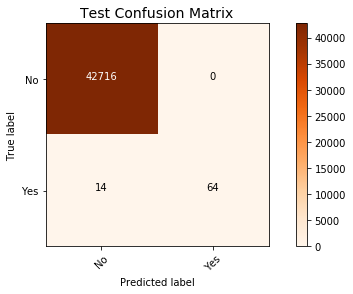

In [32]:
labels = ["No" , "Yes"]
from sklearn.metrics import confusion_matrix

# Call the function above for the....

# training data 
confusion_matrix_train_object = confusion_matrix(y_train, rf_train_pred)

# and

# test data
confusion_matrix_test_object = confusion_matrix(y_test, rf_test_pred)


fig = plt.figure(figsize=(8,4))
plot_confusion_matrix(confusion_matrix_test_object, labels, title="Test Confusion Matrix", 
                      cmap=plt.cm.Oranges)

print('\n')
tn, fp, fn, tp = confusion_matrix_test_object.ravel()
print('Of the {} items in the Test set,'.format(len(y_test)))
print('The model correctly predicts {} true positives while missing out on {} false negatives'.format(
tp, fn))

print('It also picks up {} false positives'.format(fp))

# FP of  of  is pretty bad. 
# FN of  of  is also pretty bad. 